<a href="https://colab.research.google.com/github/adityaghai07/ML-Projects/blob/main/MLP_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

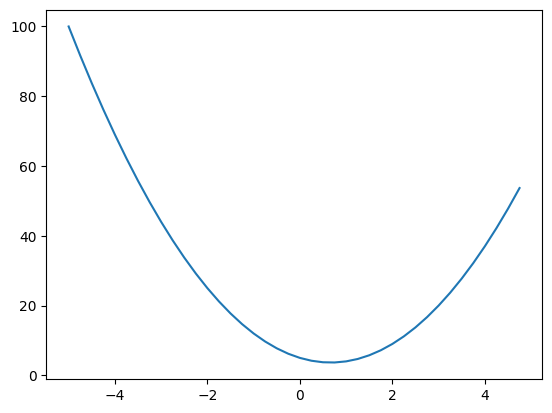

In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
ys
plt.plot(xs,ys)

In [ ]:
# derivatives!!!

h = 0.00001
x = -3.0
(f(x+h)-f(x))/h

-21.999970000052823

In [ ]:
#bit more complex
h = 0.00001
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a+=h
d2 = a*b + c

print('d1 ', d1)
print('d2 ' , d2)
print(f'slope is {(d2-d1)/h}')

d1  4.0
d2  3.9999699999999994
slope is -3.000000000064062


In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out


  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [ ]:
# d._prev

In [ ]:
# d._op

In [ ]:
# for visualisation purposes , utilizing graphviz

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f  | grad %.4f }" % (n.label , n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


In [ ]:
# L.backward()

In [ ]:
# draw_dot(L)

In [ ]:
#manually calculate the gradients once and get them filled up!


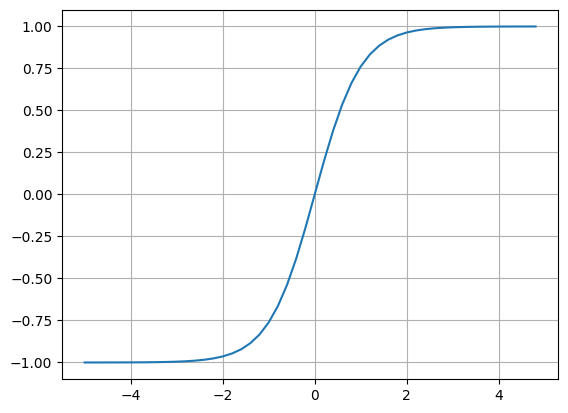

In [ ]:
plt.plot(np.arange(-5,5,0.2) , np.tanh(np.arange(-5,5,0.2))); plt.grid()

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'



In [ ]:
#manually calling the backward functions!

In [ ]:
o.grad = 1.0


In [ ]:
o._backward()

In [ ]:
n._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x2w2._backward()
x1w1._backward()

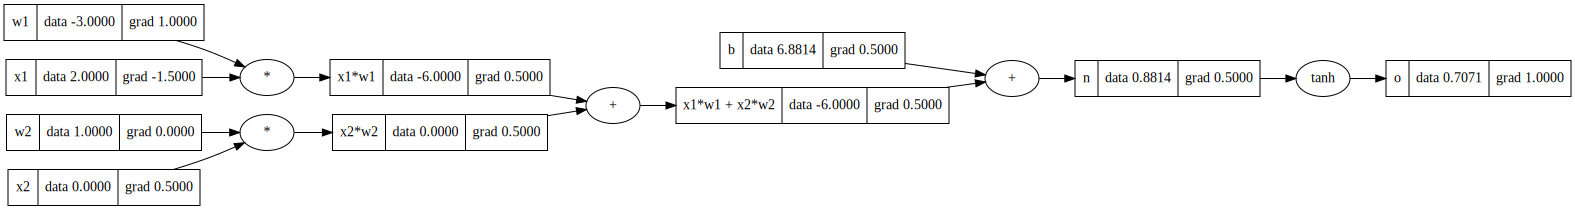

In [ ]:
draw_dot(o)


In [ ]:
#topo sort in DAG!

topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [ ]:
# Reverse the topo and run backwards !!!

o.grad = 1.0;

#topo sort in DAG!

topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

for n in reversed(topo):
  n._backward()


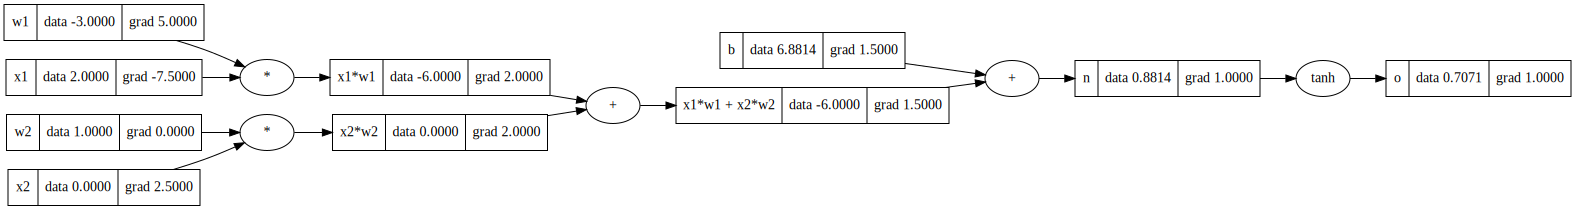

In [ ]:
draw_dot(o)

In [ ]:
import torch
import random

In [ ]:
#implementing a mlp in pytorch!

In [ ]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [ ]:
class Neuron:

  def __init__(self,nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self,x):
    # w*x + b
    # print(list(zip(self.w,x)))
    act = sum((wi*xi for wi, xi in zip(self.w,x)), self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]

class Layer:

  def __init__(self,nin,nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self,x):

    outs =  [n(x) for n in self.neurons]
    return outs[0] if len(outs)==1 else outs

  def parameters(self):

    params=[]
    for neuron in self.neurons:
      ps = neuron.parameters()
      params.extend(ps)
    return params



class MLP:

  def __init__(self,nin,nouts):
    sz = [nin] + nouts
    self.layers =   [Layer(sz[i],sz[i+1]) for i in range(len(nouts))]

  def __call__(self,x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]



x = [2.0,3.0,-1]
n = MLP(3 , [4,4,1])
n(x)

Value(data=0.9911921764763326)

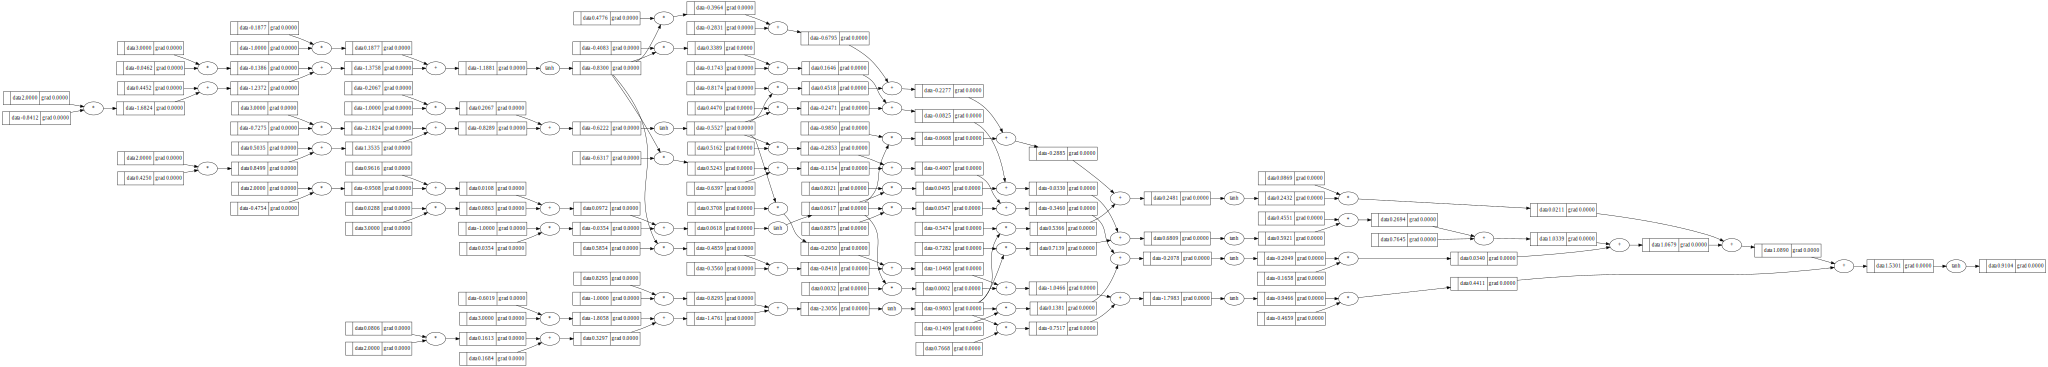

In [ ]:
draw_dot(n(x))

In [ ]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [ ]:
len(n.parameters())

41

In [ ]:
ypred = [n(x) for x in xs]
ypred

[Value(data=0.9104373814821131),
 Value(data=0.44963935796972093),
 Value(data=0.6857526255530482),
 Value(data=0.8821375001680037)]

In [ ]:
[(yout-ygt)**2 for ygt, yout in zip(ys,ypred)]

[Value(data=0.008021462635780545),
 Value(data=2.1014542681748645),
 Value(data=2.8417619145589956),
 Value(data=0.013891568866647318)]

In [ ]:
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys,ypred)])
loss

Value(data=4.965129214236288)

In [ ]:
loss.backward()

In [ ]:
n.layers[0].neurons[0].w[0].grad

-0.39813529658577357

In [ ]:
for k in range(20):

  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

  # backward pass
  for p in n.parameters():
    p.grad = 0.0 #This is Important!
  loss.backward()

  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad

  print(k, loss.data)


0 7.737105177691491
1 7.5780293050948115
2 7.158386825951213
3 5.747164855664428
4 3.115240543539352
5 1.1084514302383583
6 0.6369674928076012
7 0.34231700558746075
8 0.16008446880860194
9 0.11887526546443908
10 0.09426247014409739
11 0.0775103634280301
12 0.06546444124338055
13 0.05643895040547979
14 0.04945469707421205
15 0.04390779372295968
16 0.03940748896925107
17 0.03569074396510809
18 0.0325745298656578
19 0.029927860768771575


In [ ]:
ypred

[Value(data=0.9603317798413469),
 Value(data=-0.9475472299063659),
 Value(data=-0.909897084236309),
 Value(data=0.9129901820321428)]